<a href="https://colab.research.google.com/github/kyleegit27/knn/blob/main/knn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/ds4e/knn

Cloning into 'knn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 63 (delta 16), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (63/63), 24.29 MiB | 6.04 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (16/16), done.


In [12]:
#import packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

Q0-
1. What is the difference between regression and classification?
Regression is for predicting a numeric outcome and classification is for predicting a categorical outcome.
2. What is the confusion table? What does it help us understand about a model's performance?
A confusion table is a cross-tabulation of predicted and actual values used for classification. It is a way to conceptualize error in the model like residuals for (numeric) regression.
3. What does the SSE quantify about a particular model?
SSE is the aggregate of the squared errors for a metric of fit, so a low SSE indicates that a model is well fit.
4. What are overfitting and underfitting?
Overfitting is when the model "too complex to reliably explain" the target correlation. Converseley, underfitting is when a model is too simple to explain the target correlation.
5. Why does splitting the data into training and testing sets, and choosing k by evaluating accuracy or SSE on the test set, improve model performance?
Choosing a k and evaluating for accuracy are important tools for optimizing the way the data is sorted into clusters. Similarly, splitting the data into training and testing sets are important to measure the accuracy of the model and reevaluate based off the outcome. Both, are tools for checking model performance to then go back and make adjustments for optimal performance.
6. With classification, we can predict a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
For the probability distribution of class labels, this method provides a more nuanced statistical outcome with a measurement of confidence, but sometimes these distributions can be difficult to intuit in the context of the problem. For the class label, this outcome is straightforward to interpret, but there is no information about the confidence/unceratinty of the decision.

In [4]:
#Question 1
cars = pd.read_csv("/content/knn/data/USA_cars_datasets.csv")

In [5]:
#1.1 Keep the price, year, mileage vars only, nas? , head, dimension
cars = cars[['year', 'price', 'mileage']]

cars.head(10)

cars['year'].isna().sum()

cars['price'].isna().sum()

cars['mileage'].isna().sum()


cars.shape
#2499, 3
cars.isna().sum()

#After filtering the data set to only have three columns, there are no na values in the dataset. There are 2499 rows and three columns.

,0
year,0
price,0
mileage,0


In [6]:
#1.2 maxmin normalize year and mileage
y = cars['price']
X = cars.loc[:, ['year', 'mileage']]

#create a maxmin scalar function to normalize (same terms)

def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)


In [7]:
#applying maxmin function to vars

X = X.apply(maxmin)
X.describe()



,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [8]:
#1.3 Split data into 80% training, 20% testing

#splitting the sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)



In [39]:
#1.4 -1.5


k_bar = [3,10,25,50,100,300] #ks we want to test
SSE = [] #capturing the SSE
SSE_on_train = []

for k in k_bar:
  model = KNeighborsRegressor(n_neighbors = k)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE.append(np.sum((y_test - y_hat)**2))
  y_hat = fitted_model.predict(X_train)
  SSE_on_train.append(np.sum((y_train -y_hat)**2))


SSE_min = np.min(SSE)
min_index = np.argmin(SSE)
k_star = k_bar[min_index]
print('optimal k:', k_star)



optimal k: 50


In [33]:
#scatterplot for each k

def sc_plots(k=3,data = cars): #k = 3 is default if no k value is provided
  y = cars['price'] #target var
  X = cars.loc[:, ['year', 'mileage']] #independent vars
  X = X.apply(maxmin)  #normalize
  model = KNeighborsRegressor(n_neighbors = k) #calling the model
  fitted_model = model.fit(X, y) #fitting the model
  N_x = 100 #setting up the grid
  N_y = 100
  total = N_x*N_y
  grid_x = np.linspace(0,1,N_x)
  grid_y = np.linspace(0,1,N_y)
  xs, ys = np.meshgrid(grid_x, grid_y)
  X = xs.reshape(total) #reshaping to flatten the arrays for the dataframe (2d to 1d)
  Y = ys.reshape(total)
  x_hat = pd.DataFrame({'year':X, 'mileage':Y}) #creating the dataframe
  y_hat = fitted_model.predict(x_hat) #prediction of x
  x_hat['predicted price'] = y_hat

  #seaborn plot
  scatter = sns.scatterplot(data = x_hat, x = 'year', y = 'mileage', hue = 'predicted price', palette= 'crest', linewidth = 0)
  sns.move_legend(scatter, 'upper right', bbox_to_anchor = (1.3, 1))
  plt.title(f'Scatter plot for k = {k}') #need f in front to use curly brackets in the quote
  plt.show() #need plt.show() b/c multiple iterations


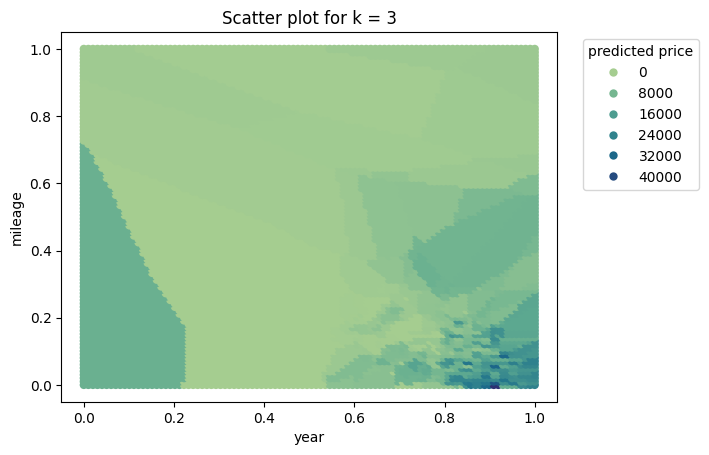

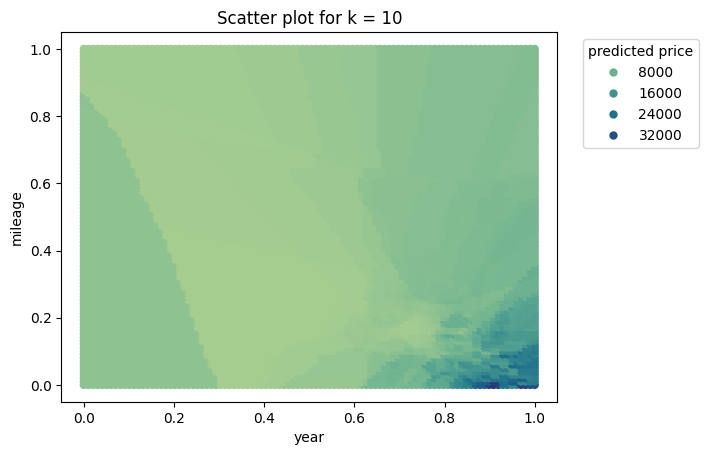

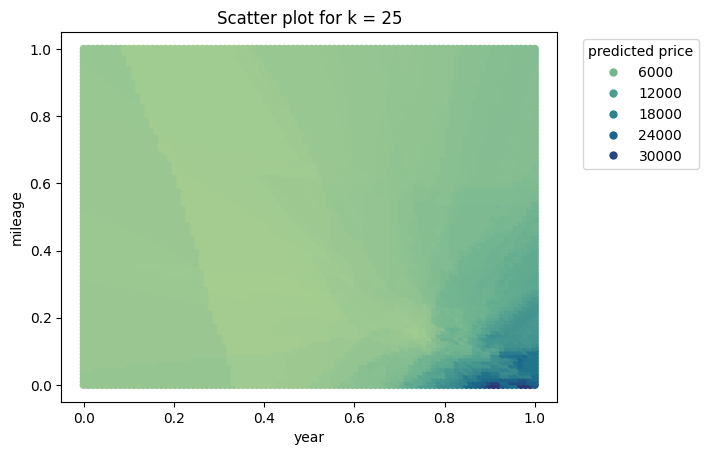

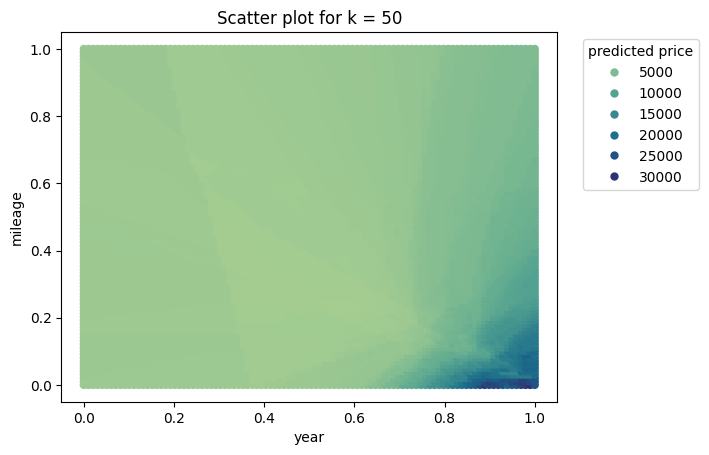

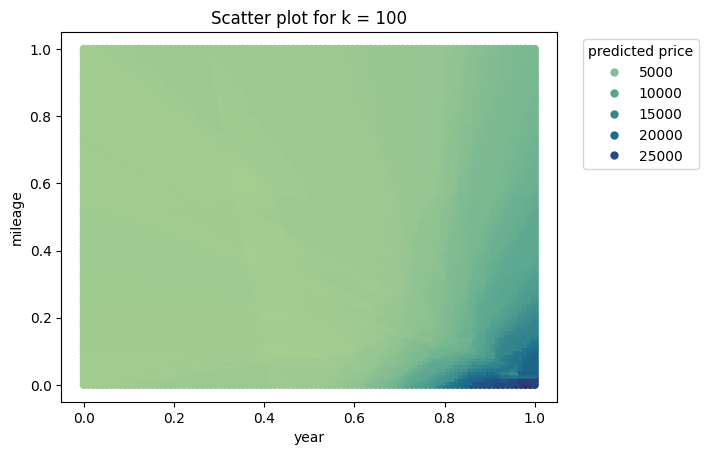

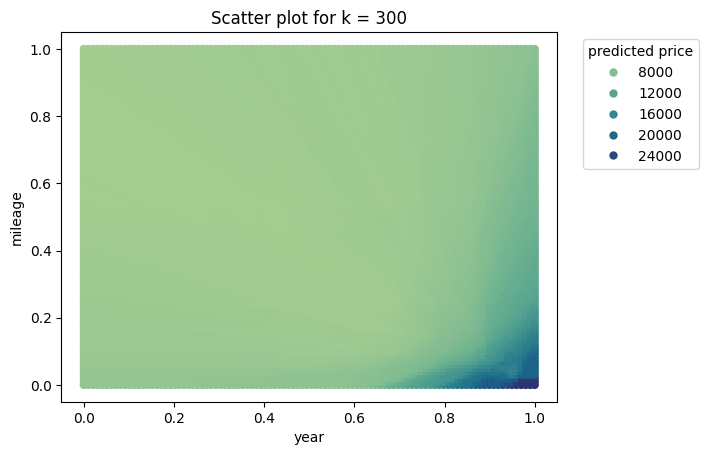

In [34]:
#plots

for k in [3,10,25,50,100,300]:
  sc_plots(k, data=cars)

In [37]:
#mean squared error for each model
for k in [3,10,25,50,100,300]:
  model = KNeighborsRegressor(n_neighbors = k)
  fitted_model = model.fit(X_train, y_train)

  y_hat_test = fitted_model.predict(X_test)

  mse = mean_squared_error(y_test, y_hat_test)

  print(f'mse for k = {k}: {mse}')

mse for k = 3: 148030494.01555553
mse for k = 10: 117496589.0113
mse for k = 25: 111096459.80207041
mse for k = 50: 108246703.2722672
mse for k = 100: 109048049.0738064
mse for k = 300: 112752334.4060045


1.4 As k goes up, there is less defined blue (higher prices), which end up concentrating in the lower right corner. Before this, the graphs are still mostly green, but there are blue parts spread throughout the graph as well.

In [ ]:
#1.6 Describe what happened in the plots of predicted v actual prices as k varied (use over/underfit).

#Plots with lower k values were underfitting the model in that it was too simple to best explain the phenomena of pricing a car
#based off of year and mileage. This can also be seen in the large mse values for k. Similarly, the higher k values overfit the model
#in that it was too complex to best explain this phenomenea we are trying to map out. The high values for mse are also evidence here.

In [40]:
! git clone https://github.com/ds4e/visualization
#Question  1 of visualization

Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 35 (delta 3), reused 2 (delta 2), pack-reused 30 (from 1)
Receiving objects: 100% (35/35), 7.16 MiB | 14.19 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [41]:
#1.1 load the data
college = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

In [48]:
#1.2
college.head()
college.shape #3798 rows 63 rows
college.describe()
college = college[['level', 'aid_value', 'control', 'grad_100_value']] #selecting important vars
#Some of the variables include location, enrollment, awards and more information about the college.

In [50]:
#1.3 cross tab control, level, patterns

cross = pd.crosstab(college['level'], college['control'])
cross

#The largest of any category is private not-for-profit 4-year schools and the lowest count are private for-profit 2-year schools.
#For the private-for-profit and public schools, the cross tab with both levels seem to be generally close in number, but private
#not-for-profit collumn has a huge disparity in the cross tab with level.

control,Private for-profit,Private not-for-profit,Public
level,,,
2-year,465,68,926
4-year,527,1180,632


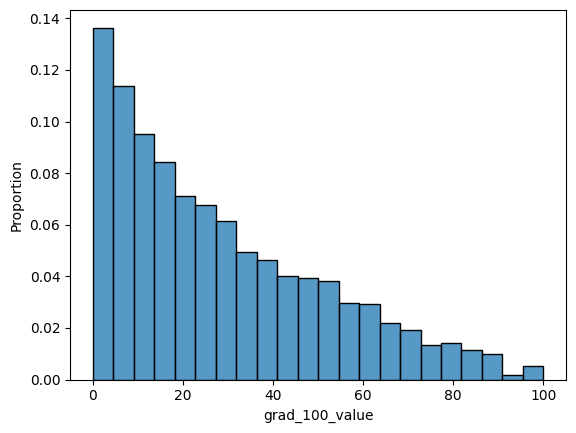

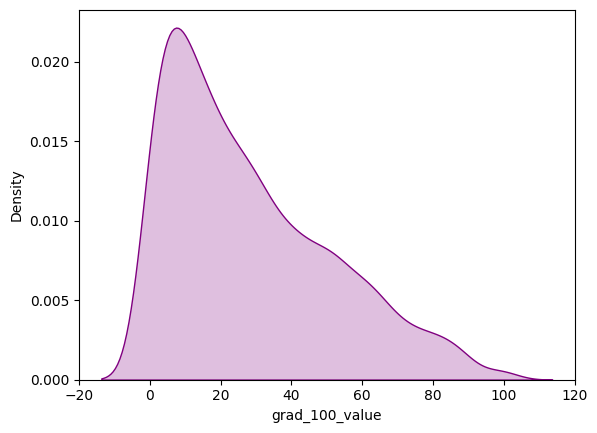

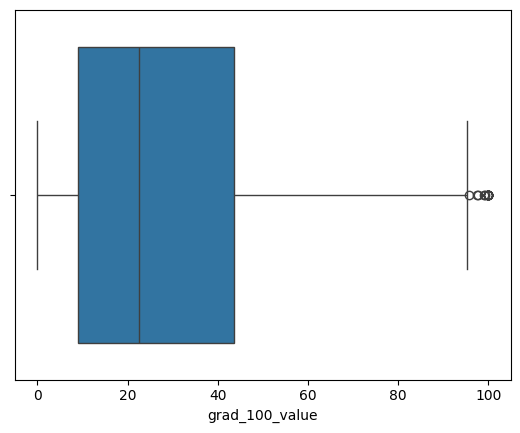

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [55]:
#1.4 create a histogram, kernel density plot, boxplot, and statistical description of grad_100_value var

#hist
sns.histplot(data= college, x = 'grad_100_value', stat = 'proportion')
plt.show()

#kde
value = college['grad_100_value']
sns.kdeplot(data=value, fill=True, color='purple')
plt.show()

#boxplot
sns.boxplot(x=college['grad_100_value'])
plt.show()

#stat description

college['grad_100_value'].describe()


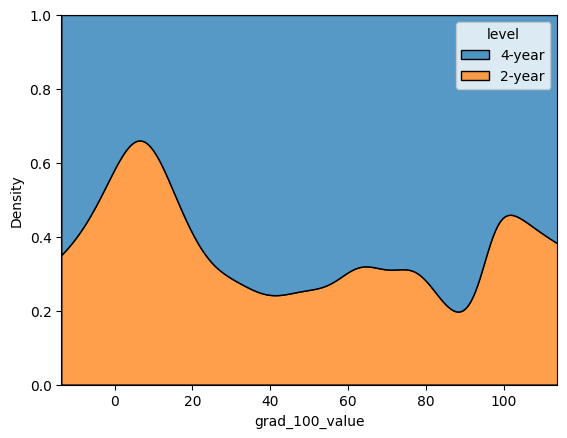

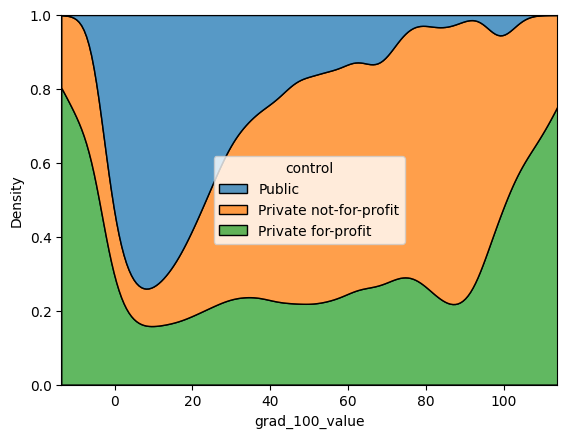

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [73]:
#1.5 create a grouped kde
#first group by level
sns.kdeplot(x = college['grad_100_value'], hue=college['level'], multiple = 'fill' )
plt.show()

#groupby control
sns.kdeplot(x=college['grad_100_value'], hue=college['control'], multiple='fill')
plt.show()

#which institutions have best grad rates?

lg = college['grad_100_value'].groupby(college['level']).describe()
lg

cg = college['grad_100_value'].groupby(college['control']).describe()
cg
#Private not-for-profit schools have a 42% graduation rate whereas 4-year institutions as a whole have a 33% graduation rate.
#These are the highest rates for the groupings, which overall have low graduation rates.

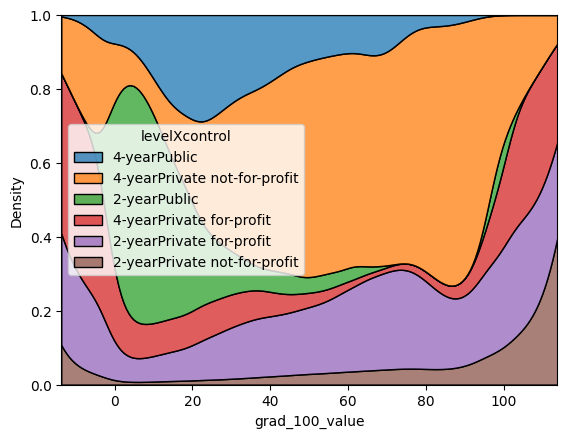

In [101]:
#1.6 create a new var, make grouped kde, which inst have best grad rates

college['levelXcontrol'] = college['level'] +college['control']

college['levelXcontrol'].describe()

sns.kdeplot(x=college['grad_100_value'], hue = college['levelXcontrol'], multiple = 'fill')
plt.show()

#It appears that 4-year private not-for-profit schools have the highest density in the upper values indicating a high
#graduation rate.

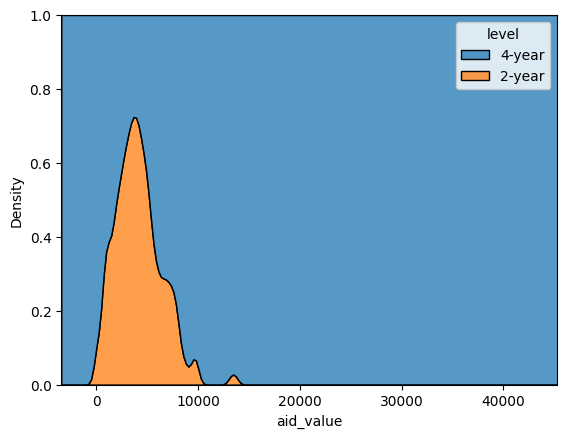

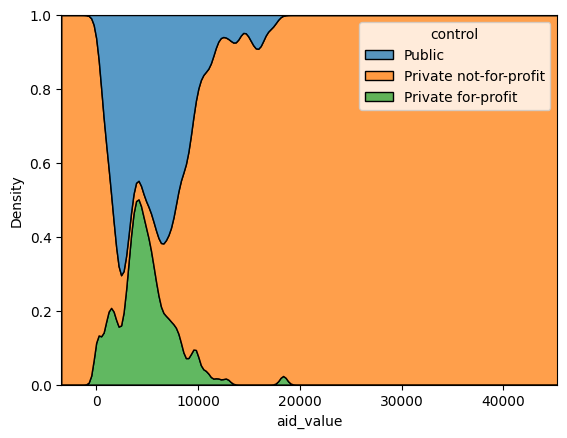

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


In [86]:
#1.7 kde of aid_value, group by level, control, what explains the shape of the graph? calculations of each

sns.kdeplot(x=college['aid_value'], hue = college['level'], multiple = 'fill')
plt.show()

sns.kdeplot(x=college['aid_value'], hue=college['control'], multiple = 'fill')
plt.show()

#The shape of these smoothed histograms show the underlying distribution of the data. For the first plot, there are more occurances of
#a 4-level college all over, but more so when aid-value passes $20,000. The 2-year college aid value has a peak around $5,000 and
#is capped around $10,000. For the second graph, the private not-for-profit schools cover the area above $20,000. Private for-profit
#has a peak around $5,000 and public schools have a bimodal distribution with 95% of the distribution accounted for before the $10,000
#mark of financial aid.

#calulations

aid_level = college['aid_value'].groupby(college['level']).describe()
aid_level
aid_control = college['aid_value'].groupby(college['control']).describe()
aid_control

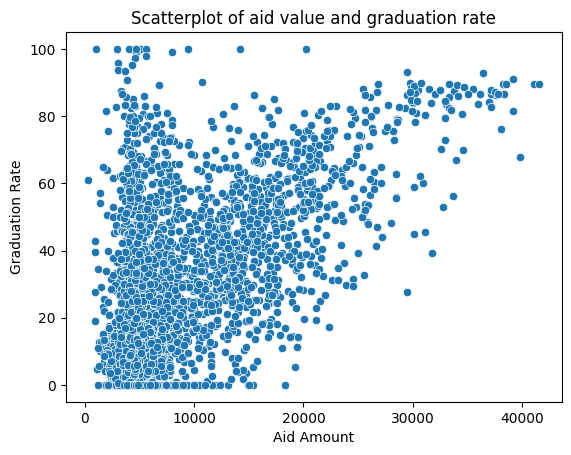

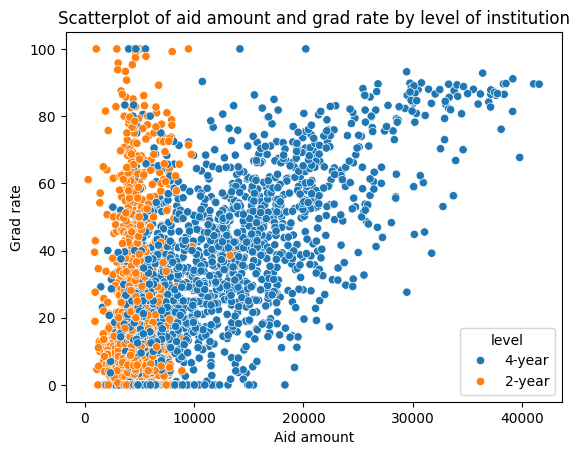

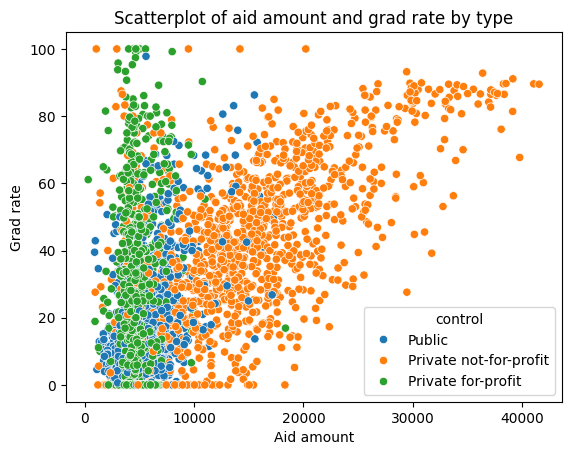

In [89]:
#1.8 scatterplot of aid value and grad 100 value, describe, then plot groupby level/control, describe,

#scatterplot of aid value and grad rate

sns.scatterplot(y = college['grad_100_value'], x=college['aid_value'])
plt.title('Scatterplot of aid value and graduation rate')
plt.xlabel("Aid Amount")
plt.ylabel("Graduation Rate")
plt.show()

#now group by level

sns.scatterplot(y=college['grad_100_value'], x=college['aid_value'], hue= college['level'])
plt.title("Scatterplot of aid amount and grad rate by level of institution")
plt.xlabel("Aid amount")
plt.ylabel("Grad rate")
plt.show()

#now group by control
sns.scatterplot(y=college['grad_100_value'], x=college['aid_value'], hue = college['control'])
plt.title("Scatterplot of aid amount and grad rate by type")
plt.xlabel("Aid amount")
plt.ylabel("Grad rate")
plt.show()


#which inst does aid inc grad rates

#These graphs show that the graduation rate of students at 4-year institutions are impacted by the amount of financial aid
#provided. Specifically private not-for-profit schools have a positive correlation between
#financial aid and grad rate.